# Machine Learning with Python
The present notebook provides data analysis on several datasets using different machine learning (ML) techniques including:
* supervised ML
    * regression models
    * classification methods
        * K nearest neighbor
        * decision tree   
        * logistic regression
        * support vector machine (SVM)
* unsupervised ML
    * clustering
        * partition-based method (k-mean)
        * hierarchical method (Agglomerative clustering)
        * density-based method (DSSCAN method)
* recommender system
    * content based
    * collaborative based  

This is a part of (Machine Learning with Python)[https://www.coursera.org/learn/machine-learning-with-python] course, offered by [coursera.org](https://www.coursera.org/).

# List of  libraries

In [2]:
from io import StringIO
import os
import pydotplus
import pandas as pd
import seaborn as sns
import numpy as np
import warnings
import seaborn as sns
import wget
from mpl_toolkits.mplot3d import Axes3D
import zipfile
import itertools

In [3]:
from scipy import stats,ndimage
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix
from scipy.optimize import curve_fit
from scipy.stats import pearsonr

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.ticker as ticker
from matplotlib.ticker import NullFormatter
%matplotlib inline

In [5]:
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import f1_score,r2_score , mean_squared_error as MSE,accuracy_score,confusion_matrix
from sklearn.metrics import jaccard_score, classification_report,log_loss
from sklearn.metrics.pairwise import euclidean_distances
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures,StandardScaler,LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn import tree,svm,manifold,datasets
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans, AgglomerativeClustering,DBSCAN

# Regression Models

## Loading dataset

In [6]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv'
df = pd.read_csv(url)

In [7]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [8]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [9]:
df.describe(include='object')

,MAKE,MODEL,VEHICLECLASS,TRANSMISSION,FUELTYPE
count,1067,1067,1067,1067,1067
unique,39,663,16,22,4
top,FORD,F150 FFV,MID-SIZE,A6,X
freq,90,8,178,222,514


## Descriptive analysis

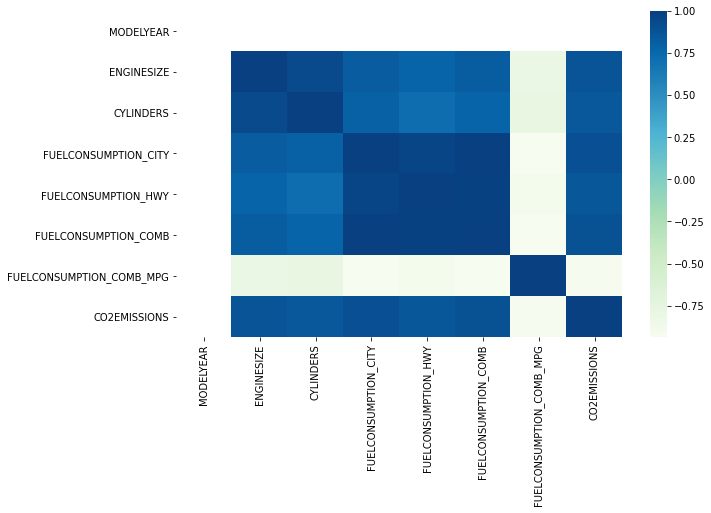

In [10]:
fig, ax = plt.subplots(figsize=(10,6))
fig01 = sns.heatmap(df.corr(),cmap='GnBu',ax=ax)
plt.show()

**Discussion**: The heatmap plot above shows that among other attributes engine size and fuel consumption_comb have high correlation coefficients with the Co2_emission.

## Splitting dataset to train and test parts

In [11]:
mask = np.random.rand(len(df))<0.8 # 80% of the observations are set to True in the mask
trn_data_auto = df[mask] # 80% of observations are assigned to training data.
tst_data_auto = df[~mask]

**Discussion**: Although using the train/test split method above increases the out of sample accuracy, the following results changes every time the above cell is run.

## Predictive analysis

### Simple linear regression model

*training the regression model using engine size feature*

In [12]:
lr_eng = LinearRegression()
lr_eng.fit(trn_data_auto[['ENGINESIZE']],trn_data_auto[['CO2EMISSIONS']])
intcpt_eng = round(lr_eng.intercept_[0],2)
coeff_eng = round(lr_eng.coef_[0][0],2)
print(f'Intercept is {intcpt_eng} and Coefficient is: {coeff_eng}')

Intercept is 125.09 and Coefficient is: 39.35


*plotting the regression plot*

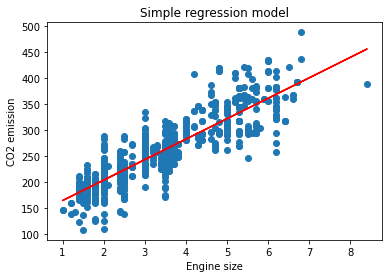

In [13]:
x_trn_eng = trn_data_auto['ENGINESIZE']
y_trn = trn_data_auto['CO2EMISSIONS']
trn_data_scatter = plt.scatter(x =x_trn_eng ,y = y_trn)
sreg = plt.plot(x_trn_eng, x_trn_eng*coeff_eng+intcpt_eng , color='red')
plt.title('Simple regression model')
plt.xlabel('Engine size')
plt.ylabel('CO2 emission')
plt.show()

*evaluating the model using R2, MSE and MAE*

In [14]:
yhat_lr_eng = lr_eng.predict(tst_data_auto[['ENGINESIZE']])
y_tst_lr = tst_data_auto[['CO2EMISSIONS']]
MAE = np.mean(np.absolute(yhat_lr_eng - y_tst_lr))[0]
MSE = (np.mean((yhat_lr_eng - y_tst_lr)**2))[0]
r2 = r2_score(yhat_lr_eng , y_tst_lr)
print(f'Mean absolute error is {round(MAE,2)}')
print(f'Mean square error is {round(MSE,2)}')
print(f'R square is {round(r2,2)}')

Mean absolute error is 23.49
Mean square error is 929.11
R square is 0.7


*training the regression model with fuel consumption _ comb*

In [15]:
x_trn_lr_full = trn_data_auto[['FUELCONSUMPTION_COMB']]
y_trn_lr = trn_data_auto[['CO2EMISSIONS']]
lr_ful = LinearRegression()
lr_ful.fit(x_trn_lr_full , y_trn_lr)
intcpt_ful = round(lr_ful.intercept_[0],2)
coeff_ful = round(lr_ful.coef_[0][0],2)

*plotting the regression line*

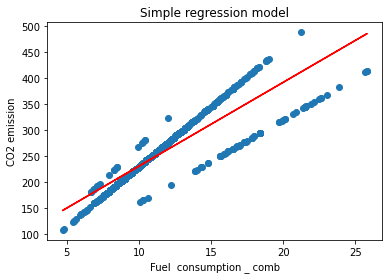

In [16]:
plt.scatter(x_trn_lr_full,y_trn_lr)
plt.plot(x_trn_lr_full , x_trn_lr_full*coeff_ful+intcpt_ful,color='red')
plt.title('Simple regression model')
plt.xlabel('Fuel  consumption _ comb')
plt.ylabel('CO2 emission')
plt.show()

*evaluating the model using R2, MSE, and MAE*

In [17]:
x_tst_lr_ful = tst_data_auto[['FUELCONSUMPTION_COMB']]
yhat_lr_ful = lr_ful.predict(x_tst_lr_ful)
##
MAE = np.mean(np.absolute(yhat_lr_ful - y_tst_lr))[0]
MSE = (np.mean((yhat_lr_ful - y_tst_lr)**2))[0]
r2 = r2_score(yhat_lr_ful , y_tst_lr)
##
print(f'Mean absolute error is {round(MAE,2)}')
print(f'Mean square error is {round(MSE,2)}')
print(f'R square is {round(r2,2)}')

Mean absolute error is 18.51
Mean square error is 664.34
R square is 0.77


**Discussion**: The results above show that the accuracy of the model is moderately good. Let's see if adding additional independent variables increase the accuracy of the model.

## Multi linear regression

*creating the regression model*

In [18]:
mlr = LinearRegression()
x1 = 'ENGINESIZE'
x2 = 'CYLINDERS'
x3 = 'FUELCONSUMPTION_COMB'
x_tr_ml = trn_data_auto[[x1,x2,x3]]
x_tst_ml = tst_data_auto[[x1,x2,x3]]
y_tr_ml = trn_data_auto[['CO2EMISSIONS']]
y_tst = tst_data_auto[['CO2EMISSIONS']]
mlr.fit(x_tr_ml , y_tr_ml)
intrcpt_mlr = mlr.intercept_[0]
cof_mlr = mlr.coef_[0]
yhat_mlr = mlr.predict(x_tst_ml)
r2_mlr = r2_score(yhat_mlr , y_tst)
print(f"""intercept is {round(intrcpt_mlr,1)}, and coefficients are:
      {round(cof_mlr[0],1)}*{x1} , {round(cof_mlr[1],1)}*{x2} , {round(cof_mlr[2],1)}*{x3},
      and R square is {round(r2_mlr,2)}""")

intercept is 66.9, and coefficients are:
      11.9*ENGINESIZE , 7.2*CYLINDERS , 9.3*FUELCONSUMPTION_COMB,
      and R square is 0.86


**Discussion**: According to the coefficients derived from fitting the multilinear regression, the engine size and fuel consumption_comb attributes have similar weight factors which is higher than the cylinder's weight factor. Let's normalize the data frame for these columns and recalculate the weight factors.

*let's normalize the independent variables and find the coefficients again*

In [19]:
warnings.filterwarnings('ignore')
mlr_1 = LinearRegression()
trn_data_auto[x1+"_n1"] = (trn_data_auto[x1]-trn_data_auto[x1].mean()) / trn_data_auto[x1].std()
trn_data_auto[x2+"_n1"] = (trn_data_auto[x2]-trn_data_auto[x2].mean()) / trn_data_auto[x2].std()
trn_data_auto[x3+"_n1"] = (trn_data_auto[x3]-trn_data_auto[x3].mean()) / trn_data_auto[x3].std()
##
x_tr_ml_n1 = trn_data_auto[[x1+"_n1",x2+"_n1",x3+"_n1"]]
##
mlr_1.fit(x_tr_ml_n1 , y_tr_ml)
intrcpt_mlr_n1 = mlr_1.intercept_[0]
cof_mlr_n1 = mlr_1.coef_[0]
print(f"""intercept is {round(intrcpt_mlr_n1,1)}, and coefficients are:
      {round(cof_mlr_n1[0],1)}*{x1} , {round(cof_mlr_n1[1],1)}*{x2} , {round(cof_mlr_n1[2],1)}*{x3}""")

intercept is 258.1, and coefficients are:
      16.9*ENGINESIZE , 12.9*CYLINDERS , 32.7*FUELCONSUMPTION_COMB


*let's normalize the independent variables and find the coefficients using another method

In [20]:
warnings.filterwarnings('ignore')
mlr_2 = LinearRegression()
trn_data_auto[x1+"_n2"] = trn_data_auto[x1]  / trn_data_auto[x1].max()
trn_data_auto[x2+"_n2"] = trn_data_auto[x2]  / trn_data_auto[x2].max()
trn_data_auto[x3+"_n2"] = trn_data_auto[x3]  / trn_data_auto[x3].max()
##
x_tr_ml_n2 = trn_data_auto[[x1+"_n2",x2+"_n2",x3+"_n2"]]
##
mlr_2.fit(x_tr_ml_n2 , y_tr_ml)
intrcpt_mlr_n2 = mlr_2.intercept_[0]
cof_mlr_n2 = mlr_2.coef_[0]
print(f"""intercept is {round(intrcpt_mlr_n2,1)}, and coefficients are:
      {round(cof_mlr_n2[0],1)}*{x1} , {round(cof_mlr_n2[1],1)}*{x2} , {round(cof_mlr_n2[2],1)}*{x3}""")

intercept is 66.9, and coefficients are:
      100.3*ENGINESIZE , 85.8*CYLINDERS , 240.7*FUELCONSUMPTION_COMB


**Discussion**: Two methods are employed to normalize the features and in both cases in contrary to the original case (without normalization) the influence of fuel consumption is far more than engine size. However, the effect of cylinder disregarding the normalization is less than the other two.

*model evaluation*

In [21]:
tst_data_auto[x1+"_n2"] = tst_data_auto[x1]  / tst_data_auto[x1].max()
tst_data_auto[x2+"_n2"] = tst_data_auto[x2]  / tst_data_auto[x2].max()
tst_data_auto[x3+"_n2"] = tst_data_auto[x3]  / tst_data_auto[x3].max()
x_tst_mlr_n2 = tst_data_auto[[x1+"_n2",x2+"_n2",x3+"_n2"]]
y_tst = tst_data_auto['CO2EMISSIONS']
yhat_mlr_n2 = mlr_2.predict(x_tst_mlr_n2)
r2_mlr_n2 = r2_score(yhat_mlr_n2 , y_tst)
print(f"""The R square (R2) is : {round(r2_mlr_n2,2)}
and mean absolute error (MAE) is {round(np.mean(np.absolute(y_tst-yhat_mlr_n2[:,0])),1)}
and mean squared error (MSE) is {round(np.mean((y_tst-yhat_mlr_n2[:,0])**2),1)}""")

The R square (R2) is : 0.86
and mean absolute error (MAE) is 16.3
and mean squared error (MSE) is 475.3


**Discussion**: Comparing the R square of multilinear regression with the one obtained from simple linear regression model shows that the additional two independent variables have increased the accuracy of the model.

### Nonlinear regression model

*model creation*

In [22]:
poly1 = PolynomialFeatures(degree=2)
lr_poly1 = LinearRegression()
xtrn_bt = trn_data_auto[[x1+"_n2",x2+"_n2",x3+"_n2"]]
ytrn = trn_data_auto['CO2EMISSIONS']
xtrn_poly1 = poly1.fit_transform(xtrn_bt)
lr_poly1.fit(xtrn_poly1 , ytrn)
##
intrcpt_poly1 = lr_poly1.intercept_
cof_poly1 = lr_poly1.coef_
print(f"""The intercept is {round(intrcpt_poly1,1)},
and coefficients are:{cof_poly1}""")

The intercept is 11.5,
and coefficients are:[    0.             6.51963782  -138.08841645   773.6642366
   219.71586494 -1097.58344157   933.47990396   375.07268121
   575.73910866 -1167.7293881 ]


*model evaluation*

In [23]:
x_tst_bt = tst_data_auto[[x1+"_n2",x2+"_n2",x3+"_n2"]]
x_tst_poly1 = poly1.fit_transform(x_tst_bt)
yhat_poly1 = lr_poly1.predict(x_tst_poly1)
ytst = tst_data_auto['CO2EMISSIONS']
print(f"""R square (R2) is : {round(r2_score(yhat_poly1 , ytst),2)}
and mean absolute error (MAE) is {round(np.mean(np.absolute(ytst-yhat_poly1)),1)}
and mean squared error (MSE) is {round(np.mean((ytst-yhat_poly1)**2),1)}""")

R square (R2) is : 0.91
and mean absolute error (MAE) is 10.5
and mean squared error (MSE) is 313.5


**Discussion**: The R square obtained from the polynomial equal with degree 2 is more than the one obtained from multilinear reg model. Also, the mean absolute error of the polynomial reg model is less than the one derived from the multilinear model. However, the mean squared error of the multilinear model is smaller than the polynomial model. As such, since the statistical results are dependent on the train/test sample selected at the beginning of the notebook, it is hard to say which model is better unless if we do cross validation and find the R square and MSE again.

# Classification

## k-nearest neighbors algorithm

### Loading data

In [24]:
url_class = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv'
df_class = pd.read_csv(url_class)

### Data wrangling 

In [25]:
df_class.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [26]:
df_class['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

In [27]:
df_class_columns = df_class.columns.to_list() # enlisting all the dataset's columns
df_class_columns.remove('custcat') 
x_list_class = df_class_columns.copy() # enlisting all the attributes except custcat which is the target value

In [28]:
x_cls_tot = df_class[x_list_class].values # creating a dataframe of all the feature variables
y_cls_tot = df_class[['custcat']].values # creating a dataframe of the target variable

In [29]:
normalize = StandardScaler() 
x_cls_tot_norm = normalize.fit_transform(x_cls_tot) # let's normalize the feature variables

*splitting the data into test and train parts*

In [30]:
xtrn,xtst,ytrn,ytst = train_test_split(x_cls_tot_norm,y_cls_tot, test_size=0.3,random_state=4)

### Model creation and evaluation

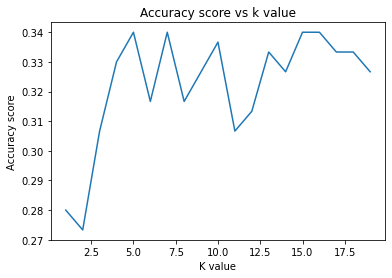

In [31]:
#model creation and finding the k value which leads to the highest accuracy score
Accuracy_score = []
for k in range(1,20):
    neigh = KNeighborsClassifier(n_neighbors=k).fit(xtrn,ytrn)
    yhat_kn = neigh.predict(xtst)
    Accuracy_score.append(accuracy_score(ytst,yhat_kn))
plt.plot(list(range(1,20)),Accuracy_score)
plt.xlabel('K value')
plt.ylabel('Accuracy score')
plt.title('Accuracy score vs k value')
plt.show()

**Discussion**: The plot above shows the highest accuracy score is around 0.34 which is low, indicating that the out of sample accuracy of the KNN model is low.

## Decision tree

### Loading the dataset

In [32]:
url_tree = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv'
df_tree = pd.read_csv(url_tree)

### Descriptive analysis

In [33]:
df_tree.head(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
5,22,F,NORMAL,HIGH,8.607,drugX
6,49,F,NORMAL,HIGH,16.275,drugY
7,41,M,LOW,HIGH,11.037,drugC
8,60,M,NORMAL,HIGH,15.171,drugY
9,43,M,LOW,NORMAL,19.368,drugY


In [34]:
df_tree.shape

(200, 6)

In [35]:
df_tree_col_list = df_tree.columns.to_list() # enlisting all the attributes
df_tree_col_list.remove('Drug') # removing the target value from the list
x_tree = df_tree[df_tree_col_list].values
x_tree[0:2] 
y_tree = df_tree['Drug'].values # assigning the target value to y_tree data series

*coll encoding method to convert numerical to categorical data*

In [36]:
le_sex = LabelEncoder()
le_sex.fit(['F','M'])
x_tree[:,1] = le_sex.transform(x_tree[:,1])

In [37]:
le_BP = LabelEncoder()
le_BP.fit(['HIGH','NORMAL','LOW'])
x_tree[:,2] = le_BP.transform(x_tree[:,2])

In [38]:
le_Cholesterol = LabelEncoder()
le_Cholesterol.fit(['HIGH','NORMAL'])
x_tree[:,3] = le_Cholesterol.transform(x_tree[:,3])

*splitting the dataset to train and test parts*

In [39]:
xtrn_tre,xtst_tre,ytrn_tre,ytst_tre = train_test_split(x_tree,y_tree,test_size=0.3,random_state=4)

### Creating the decision tree model

In [40]:
drug_tree = dtc(criterion='entropy', max_depth=4)

In [41]:
drug_tree.fit(xtrn_tre,ytrn_tre) # training the data

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [42]:
yhat_tre = drug_tree.predict(xtst_tre) # predicting the target value using the trained model

### Model evaluation

In [43]:
print(f"The accuracy score is : {round(accuracy_score(ytst_tre,yhat_tre),2)}")
print(f"The jaccard score is : {round(jaccard_score(ytst_tre,yhat_tre,average='weighted'),2)}")
print(f"The f1 score is : {round(f1_score(ytst_tre,yhat_tre,average='weighted'),2)}")

The accuracy score is : 0.97
The jaccard score is : 0.94
The f1 score is : 0.97


**Discussion**: The model evaluation presented above indicates that the decision tree model provides an excellent prediction of the test samples of the dataset.

### Decision tree visualization

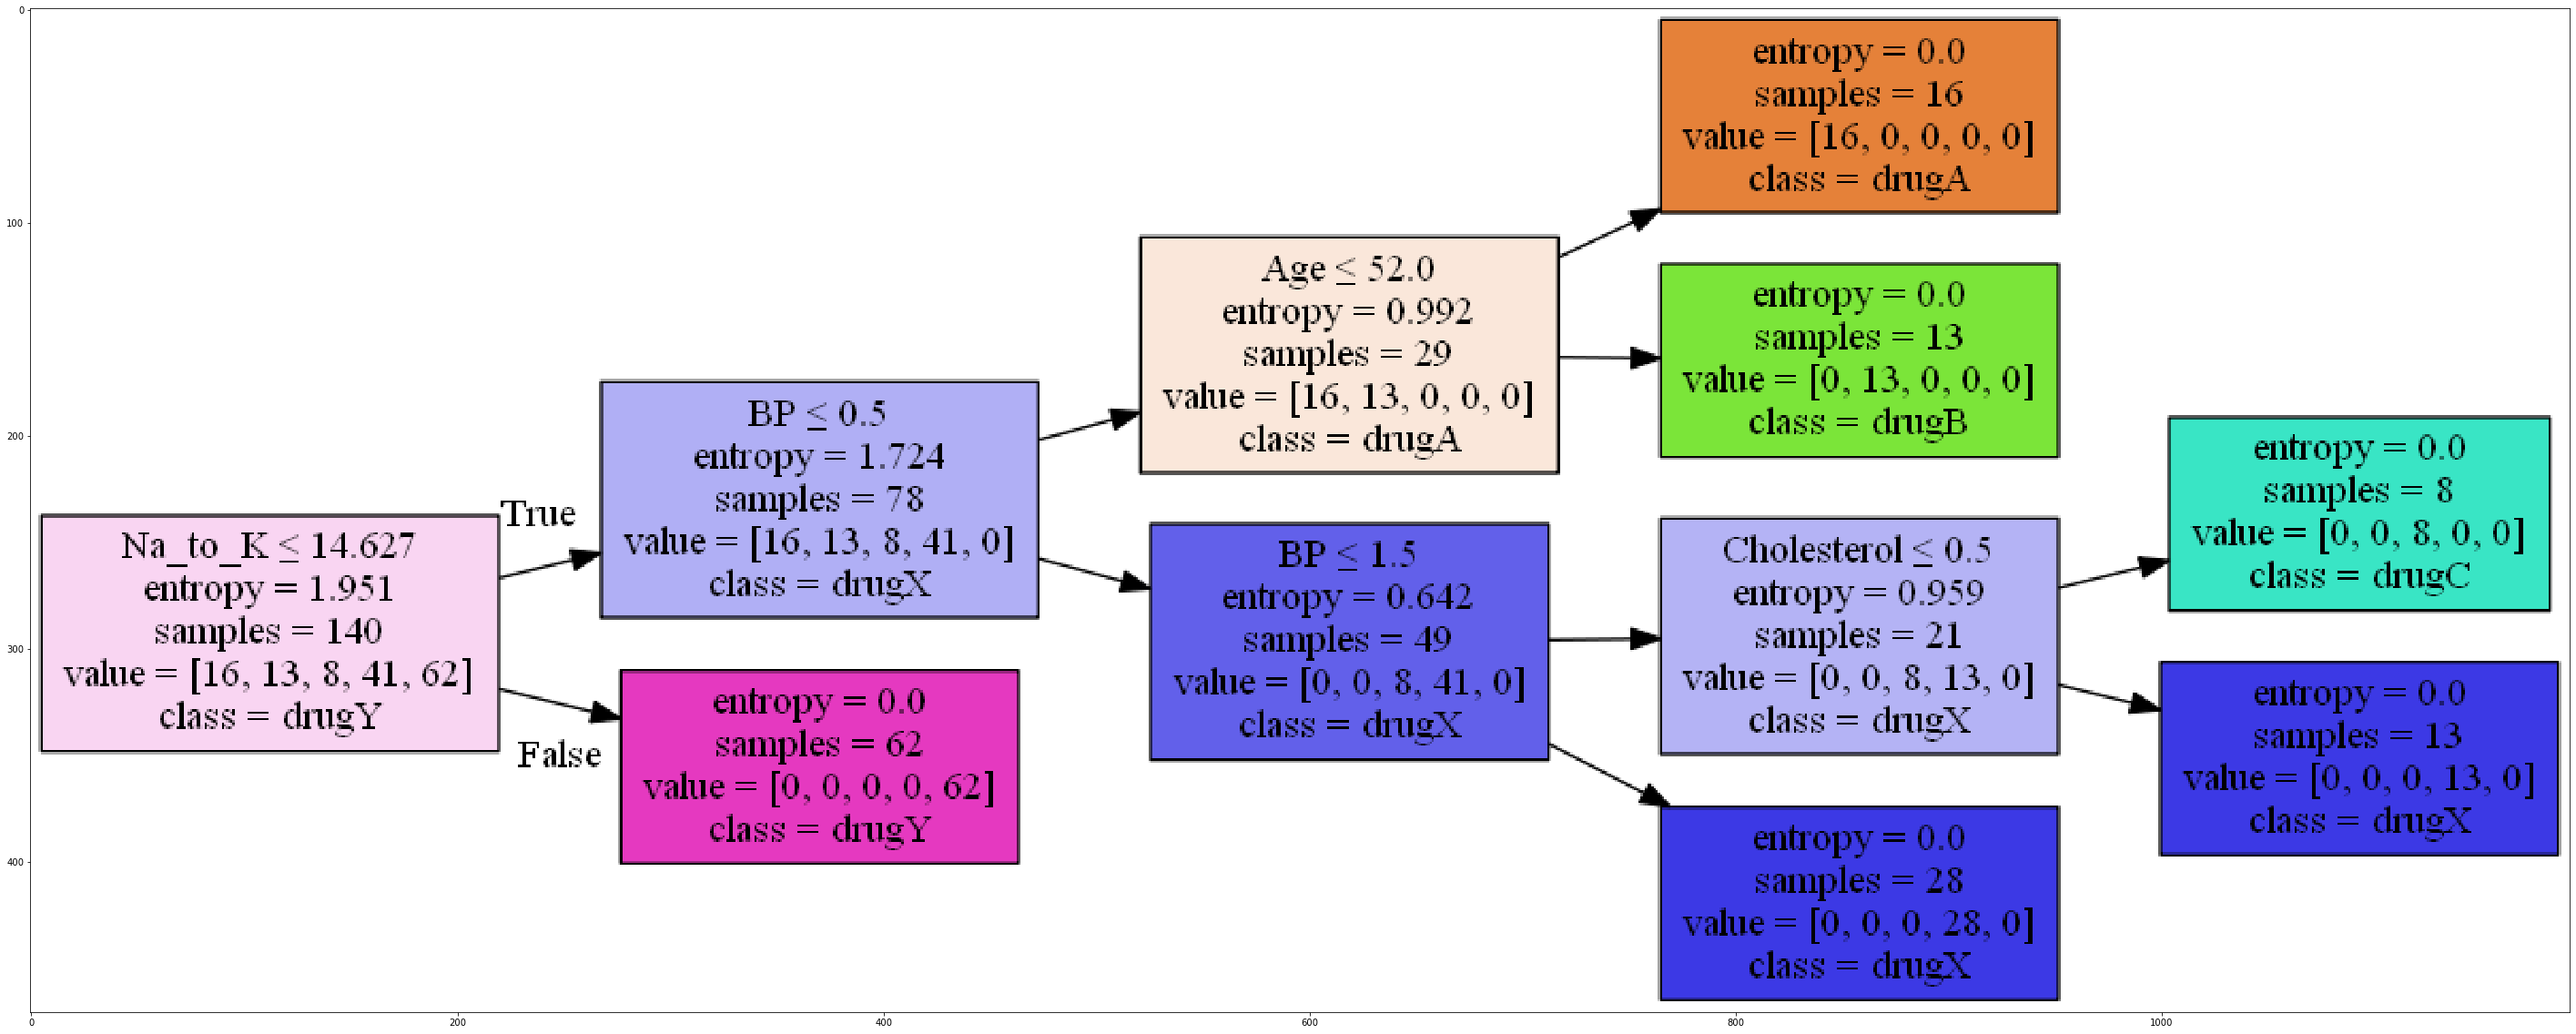

In [44]:
dot_data = StringIO()
filename = "drugtree.png"
featureNames = df_tree.columns[0:5]
out=tree.export_graphviz(drug_tree,
                         feature_names=featureNames,
                         out_file=dot_data,
                         class_names= np.unique(ytrn_tre),
                         filled=True,
                         special_characters=True,
                         rotate=True)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(50,100))
plt.imshow(img, interpolation='nearest')
plt.show()

**Discussion**: The entropy of two last leaves are 0 indicating that the accuracy of the decision tree model is pretty good.

## Logistic regression

### Loading the customer churn dataset

In [45]:
os.chdir('G:\My Drive\Career\IBM certificate\Database')

In [46]:
warnings.filterwarnings('ignore')
!wget --no-check-certificate -O ChurnData.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/ChurnData.csv

--2022-01-04 14:12:25--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/ChurnData.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
  Self-signed certificate encountered.
HTTP request sent, awaiting response... 200 OK
Length: 35943 (35K) [text/csv]
Saving to: 'ChurnData.csv'

     0K .......... .......... .......... .....                100%  242K=0.1s

2022-01-04 14:12:26 (242 KB/s) - 'ChurnData.csv' saved [35943/35943]



In [47]:
df_logist = pd.read_csv('ChurnData.csv')

### Data wrangling

In [48]:
df_logist.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [49]:
# the required dtype in skitlearn for target value is int. Hence the dtype of the target value should be changed
df_logist_slct = df_logist[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip','churn']]
df_logist_slct['churn'] = df_logist_slct['churn'].astype(int)
df_logist_slct.head(2)

,tenure,age,address,income,ed,employ,equip,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,1


In [50]:
df_logist_slct.shape

(200, 8)

In [51]:
xlogst_tot = df_logist_slct # creating a feature dataset
xlogst_tot = xlogst_tot.values

In [52]:
ylogst_tot = df_logist_slct['churn'].values # assigning the values of the target variable to ylongst_tot

### Normalizing the data

In [53]:
xlogst_tot_nrm = StandardScaler().fit_transform(xlogst_tot)

*splitting the dataset into training and test samples*

In [54]:
xtrn_lgst,xtst_lgst,ytrn_lgst,ytst_lgst = train_test_split(xlogst_tot_nrm,ylogst_tot,test_size=0.3,random_state=4)

### Model creation/optimization

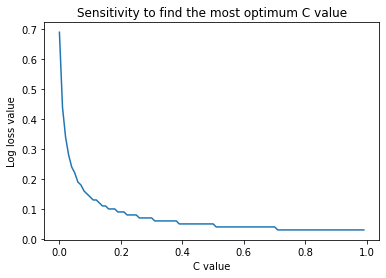

In [55]:
# let's see the effect of regulazation on the log loss value
log_loss_list = []
c_var = np.arange(0.0001,1,0.01)
solver = 'liblinear'
for C in c_var:    
    LR = LogisticRegression(C=C,solver=solver)
    LR.fit(xtrn_lgst,ytrn_lgst)
    yhat_lgst_prb = LR.predict_proba(xtst_lgst)
    log_loss_list.append(round(log_loss(ytst_lgst,yhat_lgst_prb),2))
plt.plot(c_var, log_loss_list)
plt.xlabel('C value')
plt.ylabel('Log loss value')
plt.title('Sensitivity to find the most optimum C value')
plt.show()

**Discussion**: Based on the plot above by increasing the c value the log loss value decreases. Let's use c value equal to 1.

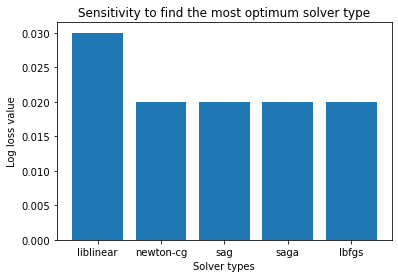

In [56]:
# let's see the effect of solver type on the model accuracy
log_loss_list = []
Solver = ['liblinear','newton-cg','sag','saga','lbfgs']
for solver in Solver:    
    LR = LogisticRegression(C=1,solver=solver)
    LR.fit(xtrn_lgst,ytrn_lgst)
    yhat_lgst_prb = LR.predict_proba(xtst_lgst)
    log_loss_list.append(round(log_loss(ytst_lgst,yhat_lgst_prb),2))
plt.bar(Solver, log_loss_list)
plt.xlabel('Solver types')
plt.ylabel('Log loss value')
plt.title('Sensitivity to find the most optimum solver type')
plt.show()

**Discussion**: The bar plot above shows the liblinear solver leads to the highest log loss value and the log loss values using the other solver types are the same. Hence, the default solver 'ibfgs' is used in this work.

### Model evaluation

In [57]:
LR = LogisticRegression(C=1,solver='lbfgs')
LR.fit(xtrn_lgst,ytrn_lgst)
##
yhat_lgst = LR.predict(xtst_lgst)
##
yhat_lgst_prb = pd.DataFrame(LR.predict_proba(xtst_lgst))
yhat_lgst_prb.columns= ["P(Y=0|X)","P(Y=1|X)"]
##
print(f"The accuracy score is : {accuracy_score(yhat_lgst,ytst_lgst)}")
print(f"The Jaccard score is : {jaccard_score(yhat_lgst,ytst_lgst)}")
print(f"The log loss is : {round(log_loss(ytst_lgst,yhat_lgst_prb),2)}")

The accuracy score is : 1.0
The Jaccard score is : 1.0
The log loss is : 0.02


**Discussion**: The accuracy scores above indicate a high accuracy of the logistic model.

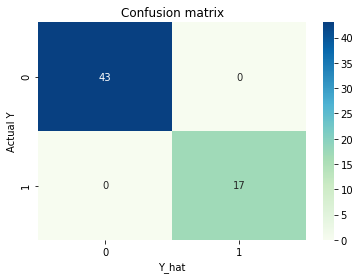

In [58]:
sns.heatmap(confusion_matrix(ytst_lgst,yhat_lgst),cmap='GnBu',annot=True)
plt.title('Confusion matrix')
plt.ylabel('Actual Y')
plt.xlabel('Y_hat')
plt.show()

**Discussion**: The confusion matrix above shows that all the data are either true positive or true negative types which is great.

In [59]:
print(classification_report(ytst_lgst,yhat_lgst))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        17

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



**Discussion**: The classification report shows the f1-score of 1 for the logistic regression model.

## Support Vector Machine (SVM)

### Loading the cell sample dataset

In [60]:
!wget --no-check-certificate -O cell_samples.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/cell_samples.csv

--2022-01-04 14:12:27--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/cell_samples.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
  Self-signed certificate encountered.
HTTP request sent, awaiting response... 200 OK
Length: 19975 (20K) [text/csv]
Saving to: 'cell_samples.csv'

     0K .......... .........                                  100%  267K=0.07s

2022-01-04 14:12:28 (267 KB/s) - 'cell_samples.csv' saved [19975/19975]



In [61]:
df_svm = pd.read_csv('cell_samples.csv')

### Data wrangling

In [62]:
df_svm.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


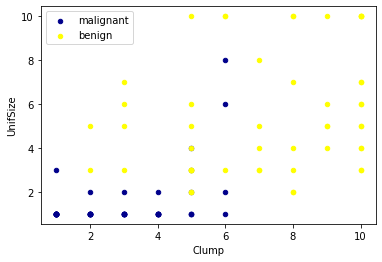

In [63]:
# let's see the distribution of classes
ax = df_svm[df_svm['Class']==2].iloc[:50,].plot(kind='scatter',x='Clump',y='UnifSize',color='darkblue',label='malignant')
df_svm[df_svm['Class']==4].iloc[:50,].plot(kind='scatter',x='Clump',y='UnifSize',color='yellow',ax=ax,label='benign')
plt.show()

In [64]:
df_svm.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Columns: 11 entries, ID to Class
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [65]:
df_svm[df_svm['BareNuc']=="?"].index
df_svm.drop(index=[23, 40, 139, 145, 158, 164, 235, 249, 275, 292, 294, 297, 315, 321,
            411, 617], inplace=True)

In [66]:
df_svm['BareNuc'] = df_svm['BareNuc'].astype('int')

In [67]:
df_svm.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int32
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

*normalizing the feature variables and target variable*

In [68]:
x_svm_tot1_norm = StandardScaler().fit_transform(df_svm[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize','BareNuc', 'BlandChrom', 'NormNucl', 'Mit']])
y_svm_tot = df_svm['Class'].values

*splitting the data into train and test samples*

In [69]:
xtrn_svm,xtst_svm,ytrn_svm,ytst_svm = train_test_split(x_svm_tot1_norm,y_svm_tot,test_size=0.3,random_state=4)

### Model creation

In [70]:
# let's use the default radial basis function as the kernel
# other kernels are linear, poly, rbf, sigmoid, and precomputed
svm_rbf = svm.SVC(kernel='rbf')
svm_rbf.fit(xtrn_svm,ytrn_svm)
yhat_svm = svm_rbf.predict(xtst_svm)

### Model evaluation

In [71]:
print(f"The accuracy score is : {round(accuracy_score(yhat_svm,ytst_svm),2)}")
print(f"The f1_score is : {round(f1_score(yhat_svm,ytst_svm,average='weighted'),2)}")
print(f"The jaccard score is : {round(jaccard_score(yhat_svm,ytst_svm,pos_label=2),2)}")

The accuracy score is : 0.94
The f1_score is : 0.94
The jaccard score is : 0.91


**Discussion**: The evaluation scores above indicate that the model prediction is quite good.

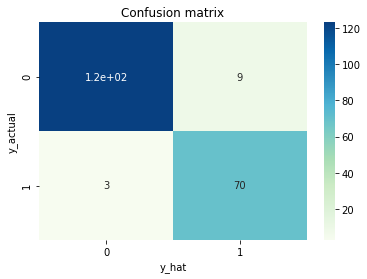

In [72]:
sns.heatmap(confusion_matrix(ytst_svm,yhat_svm),annot=True,cmap='GnBu')
plt.xlabel('y_hat')
plt.ylabel('y_actual')
plt.title('Confusion matrix')
plt.show()

In [73]:
print(f"The classification report is : {classification_report(yhat_svm,ytst_svm)}")

The classification report is :               precision    recall  f1-score   support

           2       0.93      0.98      0.95       126
           4       0.96      0.89      0.92        79

    accuracy                           0.94       205
   macro avg       0.95      0.93      0.94       205
weighted avg       0.94      0.94      0.94       205



**Discussion**: The confusion matrix above shows that the majority of data are true positive or true negative leading to high metric scores presented in the classification report.

# Clustering
## k-means (partitioned based method)

*making random data with 4 centroids provided below*

In [74]:
x_rand,y_rand = make_blobs(n_samples=5000,centers=[[4,4],[-2,1],[2,-3],[1,1]],cluster_std=0.9)

*displaying the scatter plot of the data points*

Text(0.5, 1.0, 'random data points')

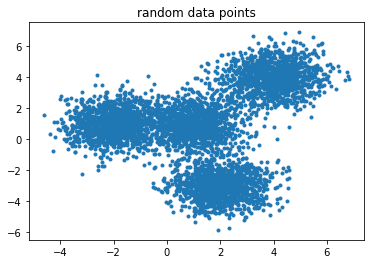

In [75]:
plt.scatter(x_rand[:,0],x_rand[:,1],marker='.')
plt.title('random data points')

### Creating the k_means model

In [76]:
k_means = KMeans(init='k-means++',n_clusters=4, n_init=12) # using 12 trials to find the most optimum centroids locations

In [77]:
k_means.fit(x_rand) # training the random data using k_mean algorithm

KMeans(n_clusters=4, n_init=12)

In [78]:
k_means_labels = k_means.labels_ # generating the list of labels for each data sample in the random dataset

In [79]:
k_means_clust_cent = k_means.cluster_centers_ # finding the centroids predicted by the k_means model
k_means_clust_cent

array([[ 1.04048168,  0.96881881],
       [ 3.97869619,  3.99599102],
       [-2.00597229,  0.96856077],
       [ 2.00127495, -3.02580198]])

**Discussion**: The centroid locations above are very close to those assigned for generating the random data.

In [80]:
colors = plt.cm.Spectral(np.linspace(0,1,len(set(k_means_labels))))
colors

array([[0.61960784, 0.00392157, 0.25882353, 1.        ],
       [0.99346405, 0.74771242, 0.43529412, 1.        ],
       [0.74771242, 0.89803922, 0.62745098, 1.        ],
       [0.36862745, 0.30980392, 0.63529412, 1.        ]])

### Visualization

Text(0.5, 1.0, 'k_means partition based clustering')

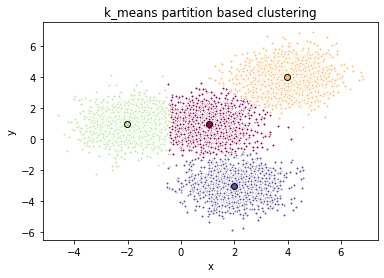

In [81]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(1,1,1)
for k, col in zip(range(4),colors):
    member = (k_means_labels ==k)
    ax.plot(x_rand[member,0],x_rand[member,1],'w',markerfacecolor=col,marker='.' )
    ax.plot(k_means_clust_cent[k,0],k_means_clust_cent[k,1],'o',
             markerfacecolor=col,marker='.',markeredgecolor='k',markersize=12)
plt.xlabel('x')
plt.ylabel('y')
plt.title('k_means partition based clustering')

**Discussion**: The above plots hows a great separation of data points using k_means partition based algorithm.

### Loading another dataset

In [82]:
!wget --no-check-certificate -O Cust_Segmentation.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%204/data/Cust_Segmentation.csv

--2022-01-04 14:12:30--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%204/data/Cust_Segmentation.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
  Self-signed certificate encountered.
HTTP request sent, awaiting response... 200 OK
Length: 33426 (33K) [text/csv]
Saving to: 'Cust_Segmentation.csv'

     0K .......... .......... .......... ..                   100%  422K=0.08s

2022-01-04 14:12:31 (422 KB/s) - 'Cust_Segmentation.csv' saved [33426/33426]



In [83]:
df_seg = pd.read_csv('Cust_Segmentation.csv')

### Data wrangling

In [84]:
df_seg.drop(['Address'],axis=1,inplace=True)

In [85]:
x_seg = df_seg.values[:,1:] # creating feature dataset
x_seg = np.nan_to_num(x_seg)
x_seg_non = StandardScaler().fit_transform(x_seg) # normalizing the feature dataset

In [86]:
k_means_seg = KMeans(init = "k-means++", n_clusters = 3, n_init = 12)

In [87]:
k_means_seg.fit(x_seg_non) 
label_seg = k_means_seg.labels_
df_seg['clust-km'] = label_seg
df_seg.groupby('clust-km').mean() # the table below presents the mean value of each attribute under each segmentation

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
clust-km,,,,,,,,,
0,424.408163,43.000000,1.931973,17.197279,101.959184,4.220673,7.954483,0.162393,13.915646
1,426.122905,33.817505,1.603352,7.625698,36.143389,0.853128,1.816855,0.000000,7.964991
2,424.451807,31.891566,1.861446,3.963855,31.789157,1.576675,2.843355,0.993939,13.994578


### Visualization

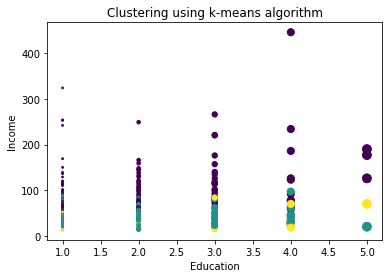

In [88]:
area = np.pi * ( x_seg[:, 1])**2  
plt.scatter(x_seg[:, 1], x_seg[:, 3], s=area, c=label_seg.astype('float'))
plt.xlabel('Education')
plt.ylabel('Income')
plt.title('Clustering using k-means algorithm')
plt.show()

**Discussion**: The above plot shows the points are well separated for different income range.

## Hierarchical clustering

### Generating random data

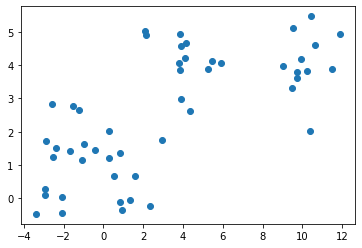

In [89]:
x_hir,y_hir = make_blobs(n_samples=50,centers=[[4,4],[-2,1],[1,1],[10,4]],cluster_std=0.9)
plt.scatter(x_hir[:,0],x_hir[:,1])

### Agglomerative clustering

*creating the model*

In [90]:
aggl = AgglomerativeClustering(n_clusters=4,linkage='average')
aggl.fit(x_hir)
labels_aggl = aggl.labels_

### Visualazation

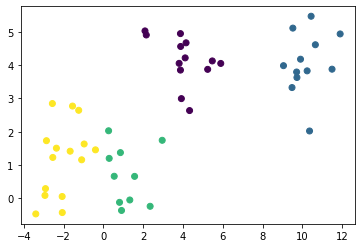

In [91]:
plt.figure(figsize=(6,4))
plt.scatter(x_hir[:,0],x_hir[:,1],c=labels_aggl.astype('float'))
plt.show()

**Discussion**: The plot above shows a pretty good clustering of data using agglomerative hierarchical clustering algorithm.

### Creating Dendrogram

In [92]:
dist_matrix = distance_matrix(x_hir,x_hir)
z = hierarchy.linkage(dist_matrix,'complete')

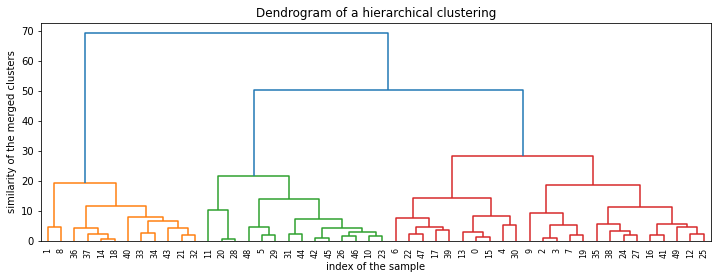

In [93]:
plt.figure(figsize=(12,4))
dendro = hierarchy.dendrogram(z)
plt.xlabel('index of the sample')
plt.ylabel('similarity of the merged clusters')
plt.title('Dendrogram of a hierarchical clustering')
plt.show()

**Discussion**: The dendrogram above shows how each sample is merged with another sample.

### Agglomerative clustering on a vehicle dataset

#### Loading dataset

In [94]:
!wget --no-check-certificate -O cars_clus.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%204/data/cars_clus.csv

--2022-01-04 14:12:35--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%204/data/cars_clus.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
  Self-signed certificate encountered.
HTTP request sent, awaiting response... 200 OK
Length: 17774 (17K) [text/csv]
Saving to: 'cars_clus.csv'

     0K .......... .......                                    100% 1.24M=0.01s

2022-01-04 14:12:35 (1.24 MB/s) - 'cars_clus.csv' saved [17774/17774]



In [95]:
df_hir = pd.read_csv('cars_clus.csv ')

#### Data wrangling 

In [96]:
df_hir.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.000,21.500,1.800,140.000,101.200,67.300,172.400,2.639,13.200,28.000,2.828,0.0
1,Acura,TL,39.384,19.875,0.000,28.400,3.200,225.000,108.100,70.300,192.900,3.517,17.200,25.000,3.673,0.0
2,Acura,CL,14.114,18.225,0.000,$null$,3.200,225.000,106.900,70.600,192.000,3.470,17.200,26.000,2.647,0.0
3,Acura,RL,8.588,29.725,0.000,42.000,3.500,210.000,114.600,71.400,196.600,3.850,18.000,22.000,2.150,0.0
4,Audi,A4,20.397,22.255,0.000,23.990,1.800,150.000,102.600,68.200,178.000,2.998,16.400,27.000,3.015,0.0


In [97]:
df_hir.shape

(159, 16)

In [98]:
df_hir.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   manufact   157 non-null    object 
 1   model      159 non-null    object 
 2   sales      159 non-null    object 
 3   resale     159 non-null    object 
 4   type       159 non-null    object 
 5   price      159 non-null    object 
 6   engine_s   159 non-null    object 
 7   horsepow   159 non-null    object 
 8   wheelbas   159 non-null    object 
 9   width      159 non-null    object 
 10  length     159 non-null    object 
 11  curb_wgt   159 non-null    object 
 12  fuel_cap   159 non-null    object 
 13  mpg        159 non-null    object 
 14  lnsales    159 non-null    object 
 15  partition  159 non-null    float64
dtypes: float64(1), object(15)
memory usage: 20.0+ KB


In [99]:
df_hir.columns

Index(['manufact', 'model', 'sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales', 'partition'],
      dtype='object')

In [100]:
df_hir_dropna = df_hir.dropna()[df_hir.dropna().resale!='$null$']
df_hir_dropna = df_hir_dropna[df_hir_dropna.price!='$null$']
df_hir_dropna = df_hir_dropna[df_hir_dropna.curb_wgt!='$null$']
df_hir_dropna = df_hir_dropna[df_hir_dropna.mpg!='$null$']

In [101]:
df_hir_dropna = df_hir_dropna.reset_index(drop=True)

In [102]:
# converting the string data types to numerical data type
df_hir_num = df_hir_dropna[['sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales', 'partition']].apply(pd.to_numeric,errors='coerce')
df_hir_num.shape

(117, 14)

In [103]:
df_hir_num.head(2)

,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,16.919,16.360,0.0,21.5,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0.0
1,39.384,19.875,0.0,28.4,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0


In [104]:
# creating feature dataset
feat_car_hir = df_hir_num[['engine_s','horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap','mpg']]

#### Normalization

In [105]:
feat_car_hir_mms = minmax_scale = MinMaxScaler().fit_transform(feat_car_hir.values)

#### Creating the model

In [106]:
agglo_car = AgglomerativeClustering(n_clusters=4,linkage='average')
agglo_car.fit(feat_car_hir_mms)
labels_agglo_car = agglo_car.labels_

#### Visualization

In [107]:
'engine_s','horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap','mpg'

('engine_s',
 'horsepow',
 'wheelbas',
 'width',
 'length',
 'curb_wgt',
 'fuel_cap',
 'mpg')

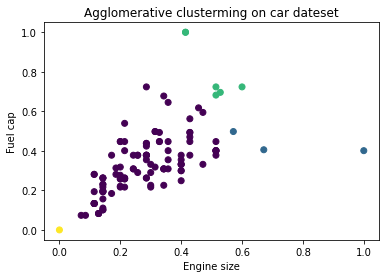

In [108]:
plt.scatter(feat_car_hir_mms[:,0],feat_car_hir_mms[:,6],c =labels_agglo_car.astype('float') )
plt.xlabel('Engine size')
plt.ylabel('Fuel cap')
plt.title('Agglomerative clusterming on car dateset')
plt.show()

**Discussion**: As the plot above displays the clustering results showing potential outlier pints in blue and yellow.

#### Dendrogram

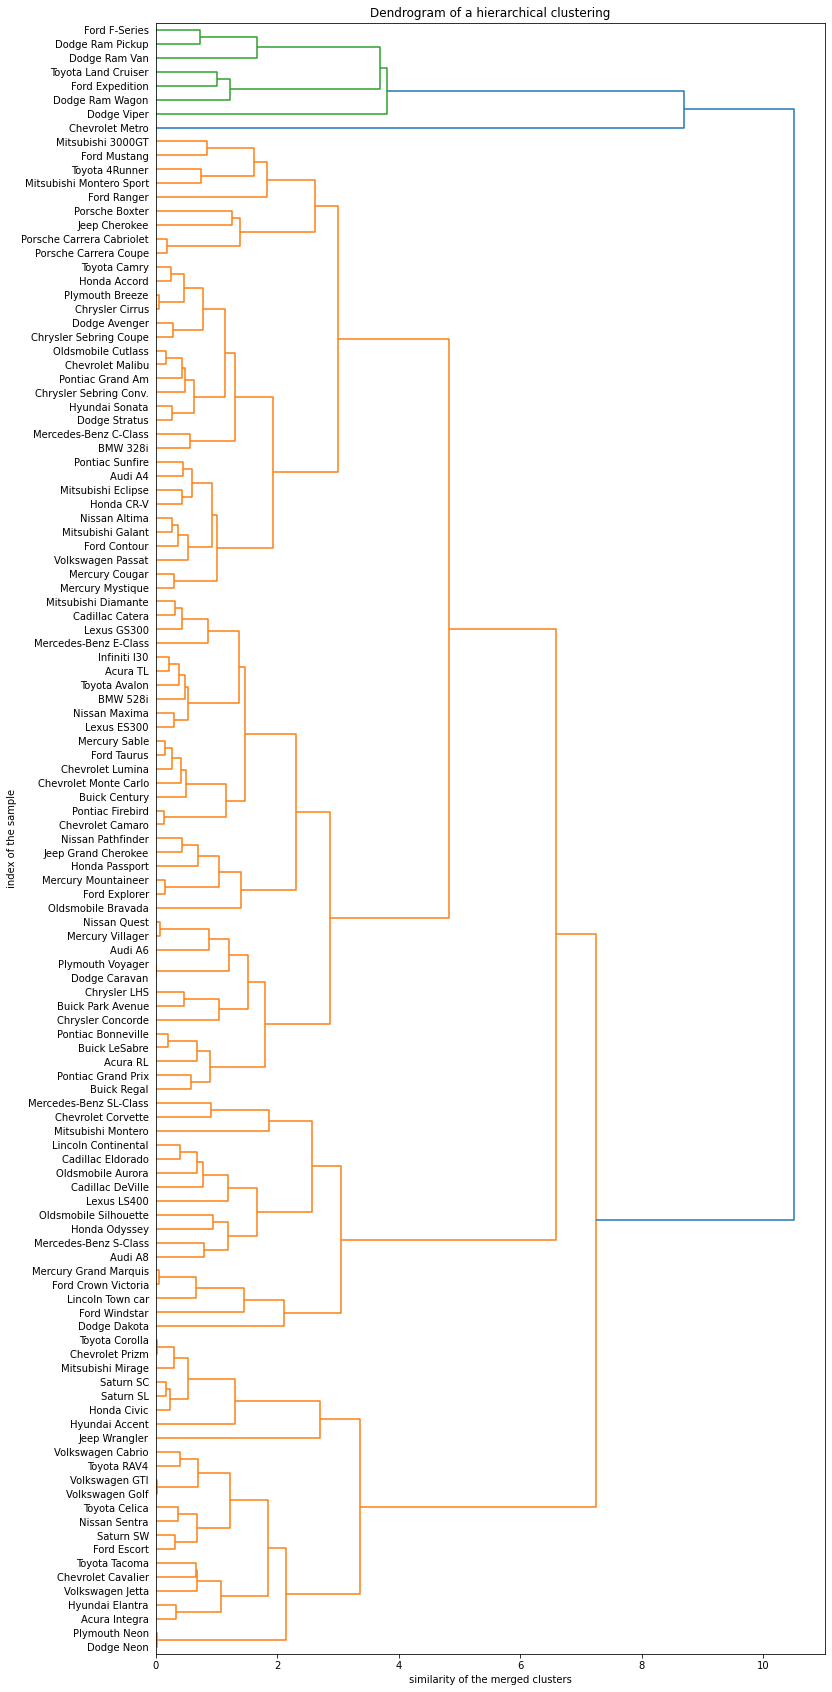

In [109]:
dist_matrix_car = distance_matrix(feat_car_hir_mms,feat_car_hir_mms)
z_car = hierarchy.linkage(dist_matrix_car,'complete')
plt.figure(figsize=(12,30))
def llf(id):
    return df_hir_dropna['manufact'][id]+' '+df_hir_dropna['model'][id]
dendro = hierarchy.dendrogram(z_car,leaf_label_func=llf, leaf_font_size=10,orientation='right')
plt.xlabel('similarity of the merged clusters')
plt.ylabel('index of the sample')
plt.title('Dendrogram of a hierarchical clustering')
plt.show()

**Discussion**: The dendrogram above provides a very interesting step by step merging progress of the observations. The manufacturer and the car model is provided for each observation.

## Density-based clustering
### DBSCN

*creating random data*

In [110]:
x_DBSCN_tot,t_DBSCN_tot = make_blobs(n_samples=1500,centers=[[4,3], [2,-1], [-1,4]],cluster_std=0.5)

*normalizing the data*

In [111]:
x_DBSCN_tot_nrm = StandardScaler().fit_transform(x_DBSCN_tot)

#### Creating the DBSCAN model

In [112]:
radius = 0.3
min_samples = 7
db = DBSCAN(eps=radius,min_samples=min_samples)
db.fit(x_DBSCN_tot_nrm)
label_dbscn = db.labels_

#### Visualization

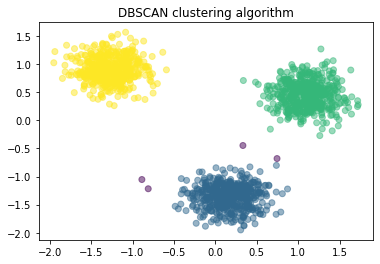

In [113]:
plt.scatter(x_DBSCN_tot_nrm[:,0],x_DBSCN_tot_nrm[:,1],marker = u'o',c =label_dbscn.astype('float'),alpha=0.5)
plt.title('DBSCAN clustering algorithm')
plt.show()

**Discussion**: The plot above displyas an interesting separation of the random data.

In [114]:
# If there is any outlier, it would be labelled -1.
set(label_dbscn)

{-1, 0, 1, 2}

###  DBSCAN clustering on weather dataset

### About the dataset

<h4 align = "center">
Environment Canada    
Monthly Values for July - 2015	
</h4>
<html>
<head>
<style>
table {
    font-family: arial, sans-serif;
    border-collapse: collapse;
    width: 100%;
}

td, th {
border: 1px solid #dddddd;
text-align: left;
padding: 8px;
}

tr:nth-child(even) {
background-color: #dddddd;
} </style>

</head>
<body>

<table>
  <tr>
    <th>Name in the table</th>
    <th>Meaning</th>
  </tr>
  <tr>
    <td><font color = "green"><strong>Stn_Name</font></td>
    <td><font color = "green"><strong>Station Name</font</td>
  </tr>
  <tr>
    <td><font color = "green"><strong>Lat</font></td>
    <td><font color = "green"><strong>Latitude (North+, degrees)</font></td>
  </tr>
  <tr>
    <td><font color = "green"><strong>Long</font></td>
    <td><font color = "green"><strong>Longitude (West - , degrees)</font></td>
  </tr>
  <tr>
    <td>Prov</td>
    <td>Province</td>
  </tr>
  <tr>
    <td>Tm</td>
    <td>Mean Temperature (°C)</td>
  </tr>
  <tr>
    <td>DwTm</td>
    <td>Days without Valid Mean Temperature</td>
  </tr>
  <tr>
    <td>D</td>
    <td>Mean Temperature difference from Normal (1981-2010) (°C)</td>
  </tr>
  <tr>
    <td><font color = "black">Tx</font></td>
    <td><font color = "black">Highest Monthly Maximum Temperature (°C)</font></td>
  </tr>
  <tr>
    <td>DwTx</td>
    <td>Days without Valid Maximum Temperature</td>
  </tr>
  <tr>
    <td><font color = "black">Tn</font></td>
    <td><font color = "black">Lowest Monthly Minimum Temperature (°C)</font></td>
  </tr>
  <tr>
    <td>DwTn</td>
    <td>Days without Valid Minimum Temperature</td>
  </tr>
  <tr>
    <td>S</td>
    <td>Snowfall (cm)</td>
  </tr>
  <tr>
    <td>DwS</td>
    <td>Days without Valid Snowfall</td>
  </tr>
  <tr>
    <td>S%N</td>
    <td>Percent of Normal (1981-2010) Snowfall</td>
  </tr>
  <tr>
    <td><font color = "green"><strong>P</font></td>
    <td><font color = "green"><strong>Total Precipitation (mm)</font></td>
  </tr>
  <tr>
    <td>DwP</td>
    <td>Days without Valid Precipitation</td>
  </tr>
  <tr>
    <td>P%N</td>
    <td>Percent of Normal (1981-2010) Precipitation</td>
  </tr>
  <tr>
    <td>S_G</td>
    <td>Snow on the ground at the end of the month (cm)</td>
  </tr>
  <tr>
    <td>Pd</td>
    <td>Number of days with Precipitation 1.0 mm or more</td>
  </tr>
  <tr>
    <td>BS</td>
    <td>Bright Sunshine (hours)</td>
  </tr>
  <tr>
    <td>DwBS</td>
    <td>Days without Valid Bright Sunshine</td>
  </tr>
  <tr>
    <td>BS%</td>
    <td>Percent of Normal (1981-2010) Bright Sunshine</td>
  </tr>
  <tr>
    <td>HDD</td>
    <td>Degree Days below 18 °C</td>
  </tr>
  <tr>
    <td>CDD</td>
    <td>Degree Days above 18 °C</td>
  </tr>
  <tr>
    <td>Stn_No</td>
    <td>Climate station identifier (first 3 digits indicate   drainage basin, last 4 characters are for sorting alphabetically).</td>
  </tr>
  <tr>
    <td>NA</td>
    <td>Not Available</td>
  </tr>

</table>

</body>
</html>


#### Loading the dataset

In [115]:
!wget --no-check-certificate -O weather-stations20140101-20141231.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%204/data/weather-stations20140101-20141231.csv

--2022-01-04 14:12:41--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%204/data/weather-stations20140101-20141231.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
  Self-signed certificate encountered.
HTTP request sent, awaiting response... 200 OK
Length: 129821 (127K) [text/csv]
Saving to: 'weather-stations20140101-20141231.csv'

     0K .......... .......... .......... .......... .......... 39%  324K 0s
    50K .......... .......... .......... .......... .......... 78%  680K 0s
   100K .......... .......... ......                          100% 6.13M=0.2s

2022-01-04 14:12:42 (546 KB/s) - 'weather-stations20140101-20141231.csv' saved [12

In [116]:
df_dbscn_weth = pd.read_csv('weather-stations20140101-20141231.csv')

#### Data wrangling

In [117]:
df_dbscn_weth.head(2)

,Stn_Name,Lat,Long,Prov,Tm,DwTm,D,Tx,DwTx,Tn,...,DwP,P%N,S_G,Pd,BS,DwBS,BS%,HDD,CDD,Stn_No
0,CHEMAINUS,48.935,-123.742,BC,8.2,0.0,NaN,13.5,0.0,1.0,...,0.0,NaN,0.0,12.0,NaN,NaN,NaN,273.3,0.0,1011500
1,COWICHAN LAKE FORESTRY,48.824,-124.133,BC,7.0,0.0,3.0,15.0,0.0,-3.0,...,0.0,104.0,0.0,12.0,NaN,NaN,NaN,307.0,0.0,1012040


In [118]:
df_dbscn_weth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1341 entries, 0 to 1340
Data columns (total 25 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Stn_Name  1341 non-null   object 
 1   Lat       1341 non-null   float64
 2   Long      1341 non-null   float64
 3   Prov      1341 non-null   object 
 4   Tm        1256 non-null   float64
 5   DwTm      1256 non-null   float64
 6   D         357 non-null    float64
 7   Tx        1260 non-null   float64
 8   DwTx      1260 non-null   float64
 9   Tn        1260 non-null   float64
 10  DwTn      1260 non-null   float64
 11  S         586 non-null    float64
 12  DwS       586 non-null    float64
 13  S%N       198 non-null    float64
 14  P         1227 non-null   float64
 15  DwP       1227 non-null   float64
 16  P%N       209 non-null    float64
 17  S_G       798 non-null    float64
 18  Pd        1227 non-null   float64
 19  BS        0 non-null      float64
 20  DwBS      0 non-null      floa

In [119]:
df_dbscn_weth['Stn_No'] = df_dbscn_weth['Stn_No'].apply(pd.to_numeric,errors='coerce')

In [120]:
df_dbscn_weth.shape

(1341, 25)

In [121]:
df_dbscn_weth.isnull().sum()

Stn_Name       0
Lat            0
Long           0
Prov           0
Tm            85
DwTm          85
D            984
Tx            81
DwTx          81
Tn            81
DwTn          81
S            755
DwS          755
S%N         1143
P            114
DwP          114
P%N         1132
S_G          543
Pd           114
BS          1341
DwBS        1341
BS%         1341
HDD           85
CDD           85
Stn_No       130
dtype: int64

In [122]:
df_dbscn_weth = df_dbscn_weth[df_dbscn_weth['Tm'].notnull()]

#### Normalizing the feature dataset

In [123]:
df_dbscn_weth_nrm = StandardScaler().fit_transform(df_dbscn_weth[['Lat','Long','Tm']].values)

#### Creating the model

In [124]:
db_weth = DBSCAN(eps=0.5,min_samples=120)
db_weth.fit(df_dbscn_weth_nrm)
labels_db_weth = db_weth.labels_

#### Visualization

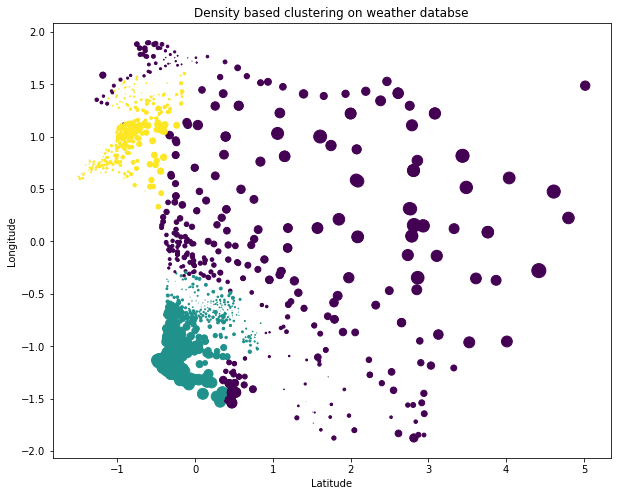

{0, 1, -1}


In [125]:
plt.figure(figsize=(10,8))
plt.scatter(df_dbscn_weth_nrm[:,0],df_dbscn_weth_nrm[:,1],s=np.pi*df_dbscn_weth_nrm[:,2]**2*10,c=labels_db_weth.astype('float'))
plt.title('Density based clustering on weather databse')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()
print(set(labels_db_weth))

**Discussion**: In the plot above, the yellow and green clusters could be removed and the rest of the data could be fitted again.

# Recommender system

#### Loading the data

The dataset could be downloaded from the following link: [Link](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%205/data/moviedataset.zip)

In [126]:
df_movie = pd.read_csv('movies.csv')
df_movie_rate = pd.read_csv('ratings.csv')

## Data wrangling

*movie dataset*

In [127]:
# let's remove the year from the title of the movies
movie_title = []
for i in df_movie.title.to_list():
    movie_title.append(i.split(" (")[0])
df_movie['title']=np.asanyarray(movie_title)

In [128]:
# let's split the genres into different categories
df_movie['genres'] = df_movie.genres.str.split('|')

In [129]:
df_movie.head(2)

,movieId,title,genres
0,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji,"[Adventure, Children, Fantasy]"


In [130]:
df_movie_with_genre = df_movie.copy()
##
for index, row in df_movie.iterrows():
    for genre in row['genres']:
        df_movie_with_genre.at[index,genre]=1
df_movie_with_genre = df_movie_with_genre.fillna(0)
df_movie_with_genre.head(2)

,movieId,title,genres,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,...,Horror,Mystery,Sci-Fi,IMAX,Documentary,War,Musical,Western,Film-Noir,(no genres listed)
0,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,Jumanji,"[Adventure, Children, Fantasy]",1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


*movie rate*

In [131]:
df_movie_rate.drop('timestamp',axis=1,inplace=True)

In [132]:
df_movie_rate.head()

,userId,movieId,rating
0,1,169,2.5
1,1,2471,3.0
2,1,48516,5.0
3,2,2571,3.5
4,2,109487,4.0


## Content based recommendations system

*choosing the user witih userId 1 as the customer whom we want to recommend a movie to*

In [133]:
user1_input = df_movie_rate[df_movie_rate.userId==1]
user1_input = user1_input.drop('userId',1)
user1_input

,movieId,rating
0,169,2.5
1,2471,3.0
2,48516,5.0


*let's find the movie genre list for the movieIds that user1 provided rating for*

In [134]:
user_genre_table = df_movie_with_genre[df_movie_with_genre.movieId.isin
                    (user1_input.movieId.to_list())].drop('title',1).drop('genres',1).drop('movieId',1).reset_index(drop=True)
user_genre_table

,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Mystery,Sci-Fi,IMAX,Documentary,War,Musical,Western,Film-Noir,(no genres listed)
0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


*let's multiply the user's rating to the genre list values for each movieId*

In [135]:
user_profile = user_genre_table.transpose().dot(user1_input['rating'])
user_profile

Adventure             5.5
Animation             0.0
Children              2.5
Comedy                3.0
Fantasy               0.0
Romance               0.0
Drama                 7.5
Action                3.0
Crime                 5.0
Thriller              5.0
Horror                0.0
Mystery               0.0
Sci-Fi                0.0
IMAX                  0.0
Documentary           0.0
War                   0.0
Musical               0.0
Western               0.0
Film-Noir             0.0
(no genres listed)    0.0
dtype: float64

*let's multiply the user rating for each genre in the genres of all the movies in the dataset*

In [136]:
weighted_genre = user_profile*(df_movie_with_genre.set_index('movieId').drop('title',1).drop('genres',1))
weighted_genre.head(2)

,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Mystery,Sci-Fi,IMAX,Documentary,War,Musical,Western,Film-Noir,(no genres listed)
movieId,,,,,,,,,,,,,,,,,,,,
1,5.5,0.0,2.5,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5.5,0.0,2.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


*now let's find the rate of every movie*

In [137]:
weighted_genre_sum = weighted_genre.sum(axis=1)/user_profile.sum()

*let's sort the movies based on the highest rate and create the recommendation table*

In [138]:
recommendation_table = df_movie[df_movie.movieId.isin(weighted_genre_sum.sort_values(ascending=False).head(20).keys())]
recommendation_table.reset_index(drop=True).head()

,movieId,title,genres
0,459,"Getaway, The","[Action, Adventure, Crime, Drama, Romance, Thr..."
1,4620,Lock Up,"[Action, Adventure, Crime, Drama, Thriller]"
2,5018,Motorama,"[Adventure, Comedy, Crime, Drama, Fantasy, Mys..."
3,5657,Flashback,"[Action, Adventure, Comedy, Crime, Drama]"
4,6016,City of God,"[Action, Adventure, Crime, Drama, Thriller]"


**Discussion**: According to the table above, 5 movies are filtered to be recommended to the user.

## Collaborative based recommendation system
### User based recommendation system

In [139]:
user1_input

,movieId,rating
0,169,2.5
1,2471,3.0
2,48516,5.0


*let's find all the users that watched the movies that user with userID 1 watched*

In [140]:
user_subset = df_movie_rate[df_movie_rate.movieId.isin(user1_input.movieId.to_list())]
user_subset = user_subset[user_subset.userId!=1]
user_subset.head(5)

,userId,movieId,rating
491,13,169,1.0
663,14,169,3.0
1298,17,169,1.0
2059,17,2471,2.0
3880,37,48516,5.0


*now let's sort the table based on the similarity of every user with userId1*

In [141]:
user_subset_group= user_subset.groupby(['userId'])
user_subset_group = sorted(user_subset_group,key=lambda x:len(x[1]),reverse=True)
user_subset_group[:2]

[(815,
         userId  movieId  rating
  73839     815      169     2.0
  74961     815     2471     2.0
  77282     815    48516     3.5),
 (4415,
          userId  movieId  rating
  408795    4415      169     0.5
  409585    4415     2471     3.5
  410996    4415    48516     3.0)]

*let's create a dictionary with keys equal to userID and value equal to the pearson coefficients*

In [142]:
pearsonCorrelationDict = {}
for id,group in user_subset_group[0:20]:
    group = group.sort_values(by='movieId')
    user1_input = user1_input.sort_values('movieId')
    user1_rating = user1_input[user1_input.movieId.isin(group.movieId.to_list())]['rating'].to_list()
    group_rating = group['rating'].to_list()
    ##
    pearsonCorrelationDict[id] = pearsonr([i for i in user1_rating],[j for j in group_rating])[0]

*let's create a data frame using the dictionary generated above and sort is based on the highest pearson coefficients*

In [143]:
pearson_df = pd.DataFrame.from_dict(pearsonCorrelationDict,orient='index')
pearson_df.columns = ['Similarity index']
pearson_df['userId'] = pearson_df.index
pearson_df.reset_index(drop=True, inplace=True)
pearson_df = pearson_df.sort_values('Similarity index',ascending=False).drop(0,0)
pearson_df.head()

,Similarity index,userId
9,1.000000,15574
15,0.998625,22788
19,0.995871,28670
14,0.989743,22306
6,0.981981,15017


*now let's find the movies that the users with the highest pearson coefficients (similarity index) watched*

In [144]:
top_user_rating = pearson_df.merge(df_movie_rate,left_on='userId',right_on='userId',how='inner')
top_user_rating.head()

,Similarity index,userId,movieId,rating
0,1.0,15574,1,2.5
1,1.0,15574,2,2.0
2,1.0,15574,3,3.5
3,1.0,15574,4,2.0
4,1.0,15574,5,1.5


*now we have the similarity index of each user with the userId1 and the rating of each user for every movie they watched. We can find the weighted rating for the movies by multiplying the rating in the similarity index*

In [145]:
top_user_rating['weighted_rating'] = top_user_rating['Similarity index']*top_user_rating['rating']

*let's drop unnecessary columns*

In [ ]:
top_user_rating = top_user_rating.drop('userId',1).drop('rating',1).drop('timestamp',1)

*let's group the data based on the movieId and find the sum of other attributes for each movieId*

In [149]:
top_user_rating_group = top_user_rating.groupby('movieId').sum()
top_user_rating_group.rename(columns={'Similarity index':'Sum similarity index','weighted_rating':'Sum weighted rating'},inplace=True)
top_user_rating_group.head()

,Sum similarity index,userId,rating,Sum weighted rating
movieId,,,,
1,15.648653,327770,69.0,57.065513
2,13.660284,282676,47.5,37.000335
3,7.836476,148173,28.0,22.525864
4,3.459484,47871,9.5,7.942947
5,7.994148,150051,29.5,22.083438


*now let's create a new column called average recom score equal to sum of weighted rating over the sum of similarity index*

In [152]:
top_user_rating_group['Average recom score'] = top_user_rating_group['Sum weighted rating']/top_user_rating_group['Sum similarity index']
top_user_rating_group.head()

,Sum similarity index,userId,rating,Sum weighted rating,Average recom score
movieId,,,,,
1,15.648653,327770,69.0,57.065513,3.646673
2,13.660284,282676,47.5,37.000335,2.708607
3,7.836476,148173,28.0,22.525864,2.874489
4,3.459484,47871,9.5,7.942947,2.295992
5,7.994148,150051,29.5,22.083438,2.762450


*let's find the movie titles for movie ids and sort the dataframe based on average recom score*

In [153]:
recom_table = top_user_rating_group.merge(df_movie,left_on='movieId',right_on='movieId',how='inner').drop('genres',1)
recom_table.sort_values('Average recom score',ascending=False)[['title','Average recom score']].head()

,title,Average recom score
2534,Longtime Companion,5.0
2657,More,5.0
2175,"Great Locomotive Chase, The",5.0
3676,House of Wax,5.0
3849,Kafka,5.0


**Discussion**: The above recommendation table presents 5 movies that user 1 might be interested in. 

In [155]:
recom_table02 = recom_table.sort_values('Sum weighted rating',ascending=False)[['title','Sum weighted rating']]
recom_table02.head()

,title,Sum weighted rating
3917,"Lord of the Rings: The Return of the King, The",68.279981
2954,"Lord of the Rings: The Fellowship of the Ring,...",67.890394
5031,"Departed, The",67.447763
1582,"Matrix, The",66.498714
3392,"Lord of the Rings: The Two Towers, The",66.089900


**Discussion**: In the above recommendation table, the table is sorted based on sum of weighted ratings. As we can see the recommendations are different compared to the previous case where the weighted rating is normalized against similarity index.